Q3.1

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import datasets

In [80]:
# code reference: lecture demo code: heart; plot_classifier comparison; plot_pca

In [82]:
# Load the dataset
data = pd.read_csv('data/marriage.csv', header=None)
# Split dataset into features x and label y, training and testing
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=496)

In [89]:
# Code ref: https://scikit-learn.org/dev/modules/generated/sklearn.naive_bayes.GaussianNB.html
#Naive Bayes
nb = GaussianNB(var_smoothing=1e-9).fit(X_train, y_train)
nb_test = nb.score(X_test, y_test)
print(f"Naive Bayes testing accuracy is {nb_test:.4f}")

# Logistic regression
logistic = LogisticRegression(max_iter=200, solver='liblinear').fit(X_train, y_train)
logistic_test = logistic.score(X_test, y_test)
print(f"Logistic Regression testing accuracy is {logistic_test:.4f}")

#KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_test = knn.score(X_test, y_test)
print(f"KNN testing accuracy is {knn_test:.4f}")

Naive Bayes testing accuracy is 0.9706
Logistic Regression testing accuracy is 0.9118
KNN testing accuracy is 0.9706


Q3.2

In [95]:
# Code ref: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html
# https://www.kaggle.com/code/sunilsharanappa/l-r-b-data-classification-using-knn-nn-svm-lr
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
# Apply PCA to project data into 2-dimensional
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Naive Bayes and accuracy score
nb = GaussianNB(var_smoothing=1e-9).fit(X_train_pca, y_train)
nb_train = accuracy_score(y_train, nb.predict(X_train_pca))
nb_test = accuracy_score(y_test, nb.predict(X_test_pca))
print(f"Naive Bayes training accuracy is {nb_train:.4f}")
print(f"Naive Bayes testing accuracy is {nb_test:.4f}")

# Logistic Regression and accuracy score
logistic = LogisticRegression().fit(X_train_pca, y_train)
logistic_train = accuracy_score(y_train, logistic.predict(X_train_pca))
logistic_test = accuracy_score(y_test, logistic.predict(X_test_pca))
print(f"Logistic Regression training accuracy is {logistic_train:.4f}")
print(f"Logistic Regression testing accuracy is {logistic_test:.4f}")

# K-Nearest Neighbors and accuracy score
knn = KNeighborsClassifier().fit(X_train_pca, y_train)
knn_train = accuracy_score(y_train, knn.predict(X_train_pca))
knn_test = accuracy_score(y_test, knn.predict(X_test_pca))
print(f"KNN training accuracy is {knn_train:.4f}")
print(f"KNN testing accuracy is {knn_test:.4f}")

Naive Bayes training accuracy is 0.9779
Naive Bayes testing accuracy is 0.9706
Logistic Regression training accuracy is 0.9853
Logistic Regression testing accuracy is 1.0000
KNN training accuracy is 0.9853
KNN testing accuracy is 0.9706


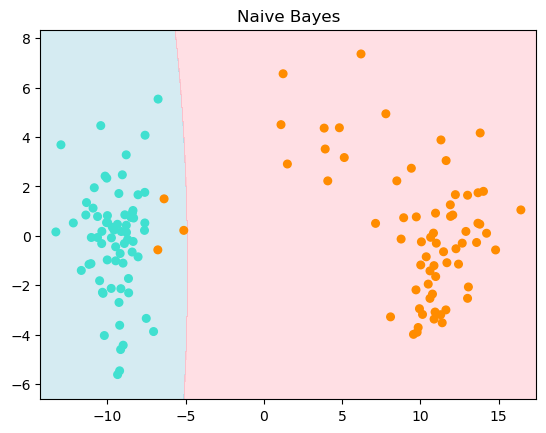

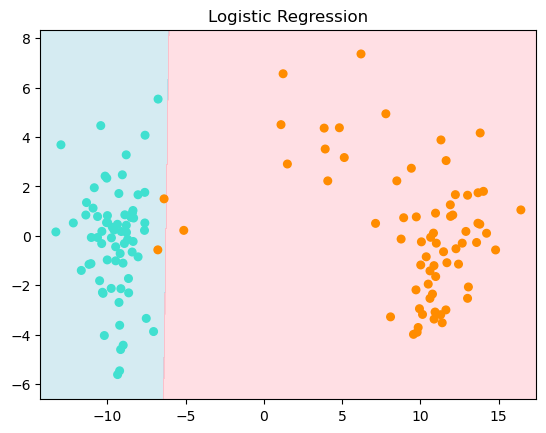

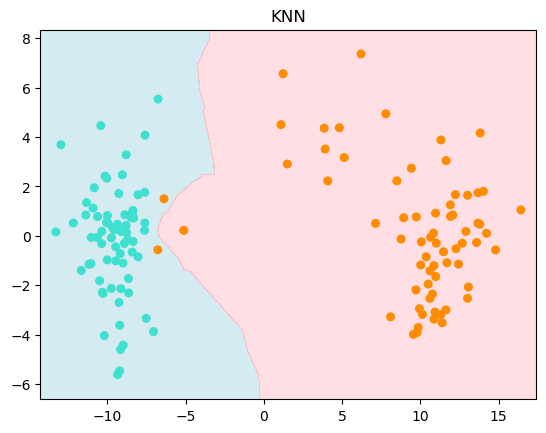

In [102]:
# Code ref: https://scikit-learn.org/dev/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
# https://github.com/nex3z/machine-learning-exercise/blob/master/coursera-machine-learning-python/ex2/plot_decision_boundary.py
# https://community.deeplearning.ai/t/plot-decision-boundary/26014
# https://www.mathworks.com/help/matlab/ref/meshgrid.html
# Flatten array, predict labels and Plot decision boundaries for the NB, LR, KNN
def plot_decision_boundary(Z, X, y, title, filename):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    Z = Z.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'pink')), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=30, cmap=ListedColormap(('turquoise', 'darkorange')))
    plt.title(title)
    plt.savefig(f'{filename}.jpg', format='jpg')
    plt.show()

plot_decision_boundary(nb, X_train_pca, y_train, "Naive Bayes", "naive_bayes_pca")
plot_decision_boundary(logistic, X_train_pca, y_train, "Logistic Regression", "logistic_regression_pca")
plot_decision_boundary(knn, X_train_pca, y_train, "KNN", "knn_pca")